# DS2500 Homework 4
### Sydney Howard

### Part 1 - Questions About The Data

In [1]:
# Import Libraries
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
# Defining API key, keywords to sort by, and url
API_KEY = '8b42e0059e644aaabe2414fc920faf4f'
keyword = 'environment', 'climate change'
url = f'https://newsapi.org/v2/everything?q={keyword}&apiKey={API_KEY}'

response = requests.get(url)
data = response.json()

# Extract article contents
articles = data.get('articles', [])
contents = [article['content'] for article in articles if article['content']]

In [3]:
# Convert the contents of the articles into a TF-IDF matrix
vectorizer = TfidfVectorizer(max_features=500)  
tfidf_matrix = vectorizer.fit_transform(contents)

In [4]:
# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Print the first two values of the first article
print("First article's reduced values:", reduced_data[0])

First article's reduced values: [0.18567111 0.02287414]


In [5]:
# Try different values of k to calculate inertia
inertias = []
k_values = range(1, 10)  # Test k from 1 to 9

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(reduced_data)
    inertias.append(kmeans.inertia_)

In [6]:
# Apply KMeans clustering 
optimal_k = 3 # See elbow graph below
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(reduced_data)
labels = kmeans.labels_

# Count articles in each cluster
from collections import Counter
cluster_counts = Counter(labels)
print("Number of articles per cluster:", cluster_counts)

Number of articles per cluster: Counter({2: 70, 0: 17, 1: 13})


### Part 2 - Visualizing the Data

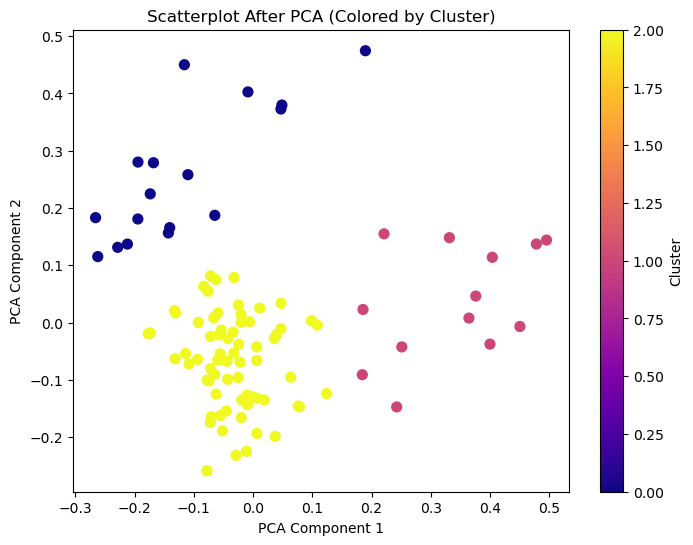

In [7]:
# Plot 1: Scatterplot after PCA with cluster colors
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='plasma', s=50)
plt.title('Scatterplot After PCA (Colored by Cluster)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.savefig('scatterplot_pca_clusters.png')
plt.show()

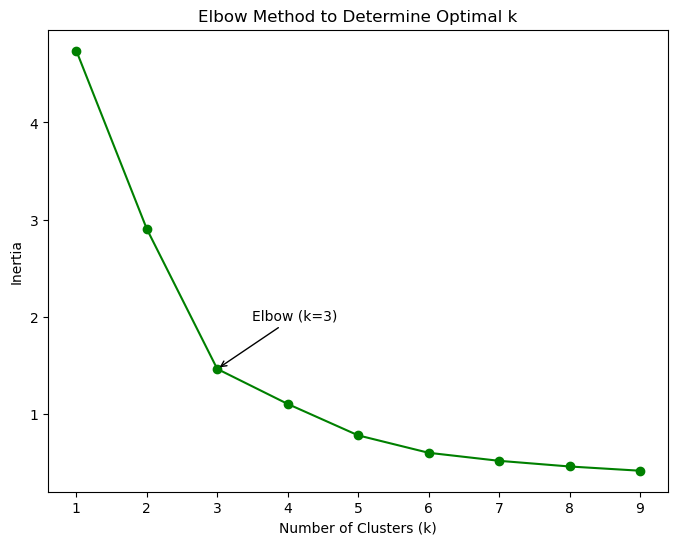

In [11]:
# Plot 2: Elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, 'o-', color='green')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)

# Label at elbow
elbow_x = 3
elbow_y = inertias[k_values.index(elbow_x)]
plt.annotate('Elbow (k=3)', (elbow_x, elbow_y), xytext=(elbow_x + 0.5, elbow_y + 0.5),
             arrowprops=dict(arrowstyle='->', color='black'))

plt.savefig('elbow_method_plot.png')
plt.show()